Importing Libraries

In [1]:
import os
import numpy as np
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

Load and preprocess the data

In [2]:
data_dir = "../data/cell_images/"
class_names = ["Parasitized", "Uninfected"]
image_size = (33, 33)

In [3]:
images = []
labels = []

In [4]:
for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_path):
        if image_file.endswith(".png"):
            image_path = os.path.join(class_path, image_file)
            try:
                image = Image.open(image_path).resize(image_size)
                images.append(np.array(image))
                labels.append(class_names.index(class_name))
            except (UnidentifiedImageError, OSError) as e:
                print("Invalid file:", image_path)
                print("Error:", str(e))

In [5]:
images = np.array(images) / 255.0
labels = np.array(labels)

Split the data

In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

Define the model

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(33,33,3)))
model.add(Conv2D(64,(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

Train the model

In [8]:
history=model.fit(train_images,train_labels,batch_size = 10,epochs=5,verbose= 1,validation_data=(test_images,test_labels))

Epoch 1/5


C:\Users\Arnav Sharma\AppData\Roaming\Python\Python38\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2205/2205 [==============================] - 44s 20ms/step - loss: 0.3648 - accuracy: 0.8189 - val_loss: 0.1710 - val_accuracy: 0.9434
Epoch 2/5
2205/2205 [==============================] - 39s 18ms/step - loss: 0.1486 - accuracy: 0.9496 - val_loss: 0.1419 - val_accuracy: 0.9507
Epoch 3/5
2205/2205 [==============================] - 38s 17ms/step - loss: 0.1309 - accuracy: 0.9554 - val_loss: 0.1430 - val_accuracy: 0.9507
Epoch 4/5
2205/2205 [==============================] - 38s 17ms/step - loss: 0.1143 - accuracy: 0.9592 - val_loss: 0.1504 - val_accuracy: 0.9516
Epoch 5/5
2205/2205 [==============================] - 38s 17ms/step - loss: 0.0979 - accuracy: 0.9655 - val_loss: 0.1438 - val_accuracy: 0.9526


Evaluate the model

In [9]:
_,accuracy=model.evaluate(test_images,test_labels)
print('Accuracy=%.2f'%(accuracy*100))

173/173 [==============================] - 1s 8ms/step - loss: 0.1438 - accuracy: 0.9526
Accuracy=95.26


Plot the accuracy

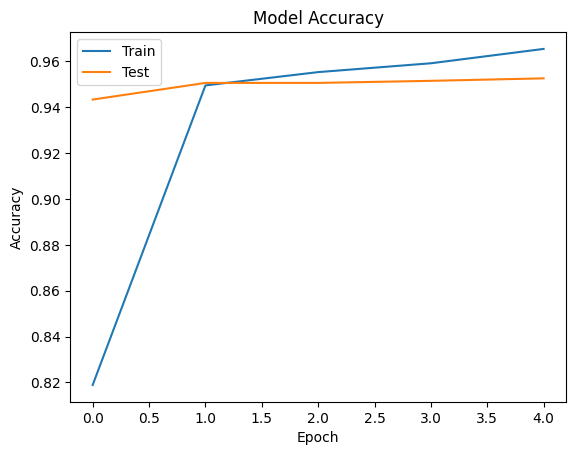

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

Plot the loss

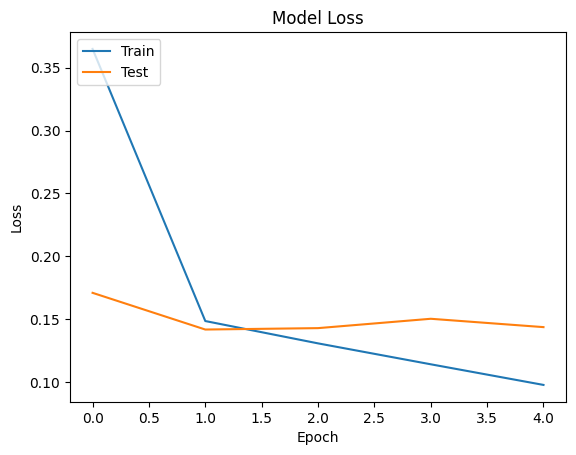

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

Save the model

In [12]:
model.save('../models/malaria.h5')